câu a

In [2]:
import pandas as pd

train = pd.read_csv("dataset/heart.csv")
print("Bùi Hoàn Duy - 6351071012")
print("Train:", len(train))


Bùi Hoàn Duy - 6351071012
Train: 303


In [3]:
import pandas as pd

# 2.1 XÓA các dòng có ký tự '?' (có thể có khoảng trắng)
train_clean = train.replace(r'^\s*\?$', pd.NA, regex=True).dropna()

print("Train sau khi xoá '?':", len(train_clean))
print("Bùi Hoàn Duy - 6351071012")
# 2.2 XÓA cột fnlwgt ở cả train + test
cols_to_drop = ["fnlwgt"]
train_clean = train_clean.drop(columns=[c for c in cols_to_drop if c in train_clean.columns])

# 2.3 NỐI dữ liệu train + test
data = pd.concat([train_clean], ignore_index=True)

print("\n=== Thông tin DataFrame sau xử lý ===")
data.info()

Train sau khi xoá '?': 303
Bùi Hoàn Duy - 6351071012

=== Thông tin DataFrame sau xử lý ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Câu b

Câu 3

Bùi Hoàn Duy - 6351071012


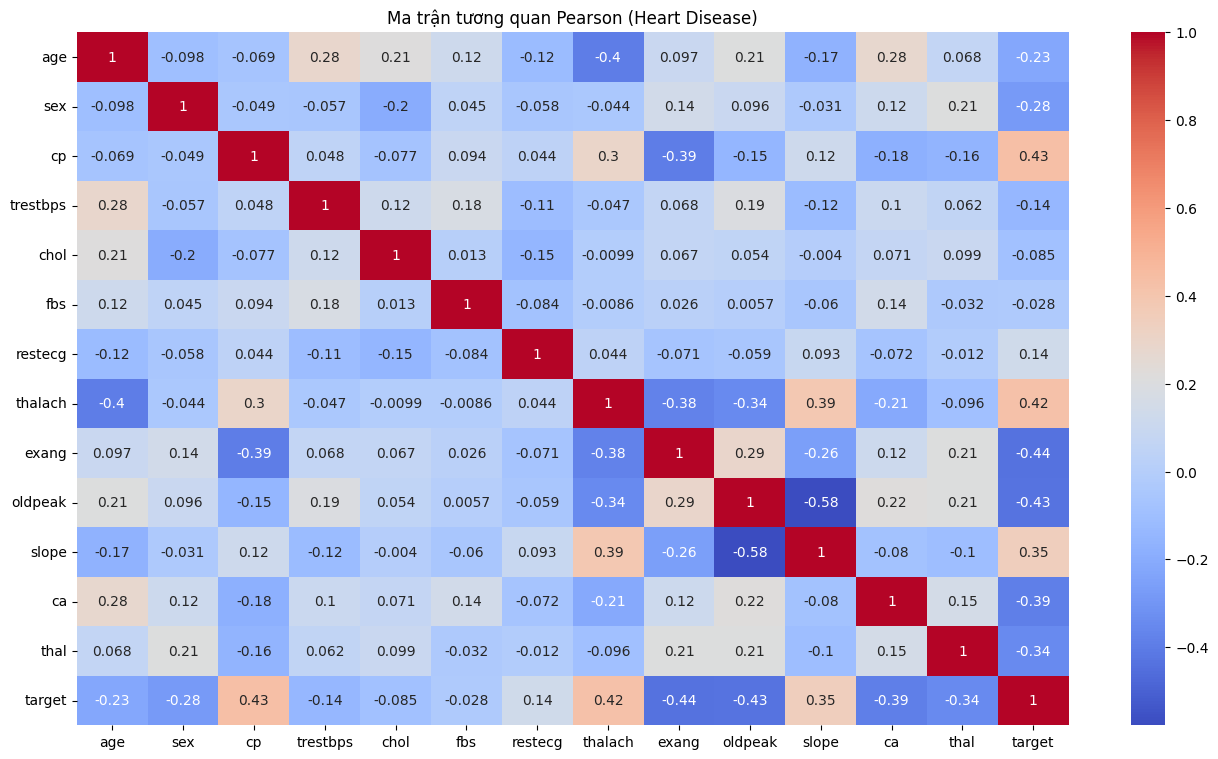


Các cột có tương quan cao cần loại bỏ:
set()

Số cột ban đầu: 14
Số cột sau khi loại bỏ: 14


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = data.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df.corr(method='pearson')
plt.figure(figsize=(16, 9))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
print("Bùi Hoàn Duy - 6351071012")
plt.title('Ma trận tương quan Pearson (Heart Disease)')
plt.show()
threshold = 0.8   # Ngưỡng loại
columns_to_drop = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            columns_to_drop.add(colname)

print("\nCác cột có tương quan cao cần loại bỏ:")
print(columns_to_drop)

# Loại cột
df_filtered = data.drop(columns=list(columns_to_drop))

print("\nSố cột ban đầu:", data.shape[1])
print("Số cột sau khi loại bỏ:", df_filtered.shape[1])


Câu 4

In [ ]:
# 4. Tách thuộc tính (features) và nhãn quyết định (label)
print("Bùi Hoàn Duy - 6351071012")

features = df_filtered.drop('target', axis=1)
labels = df_filtered['target']                 

print("Kích thước features:", features.shape)
print("Kích thước labels:", labels.shape)


Bùi Hoàn Duy - 6351071012
Kích thước features: (303, 13)
Kích thước labels: (303,)


Câu 5

In [6]:
print("Bùi Hoàn Duy - 6351071012")
features_onehot = pd.get_dummies(features, columns=features.select_dtypes(exclude=['int64']).columns)
features_onehot

Bùi Hoàn Duy - 6351071012


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,slope,...,oldpeak_3.2,oldpeak_3.4,oldpeak_3.5,oldpeak_3.6,oldpeak_3.8,oldpeak_4.0,oldpeak_4.2,oldpeak_4.4,oldpeak_5.6,oldpeak_6.2
0,63,1,3,145,233,1,0,150,0,0,...,False,False,False,False,False,False,False,False,False,False
1,37,1,2,130,250,0,1,187,0,0,...,False,False,True,False,False,False,False,False,False,False
2,41,0,1,130,204,0,0,172,0,2,...,False,False,False,False,False,False,False,False,False,False
3,56,1,1,120,236,0,1,178,0,2,...,False,False,False,False,False,False,False,False,False,False
4,57,0,0,120,354,0,1,163,1,2,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,1,...,False,False,False,False,False,False,False,False,False,False
299,45,1,3,110,264,0,1,132,0,1,...,False,False,False,False,False,False,False,False,False,False
300,68,1,0,144,193,1,1,141,0,1,...,False,True,False,False,False,False,False,False,False,False
301,57,1,0,130,131,0,1,115,1,1,...,False,False,False,False,False,False,False,False,False,False


Câu 6

In [12]:
from sklearn.model_selection import train_test_split

print("Bùi Hoàn Duy - 6351071012")

# 6. Chia dữ liệu train/test theo tỉ lệ 70% - 30%
X_train, X_test, y_train, y_test = train_test_split(
    features_onehot,
    labels,
    test_size=0.3,
    random_state=42
)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


Bùi Hoàn Duy - 6351071012
X_train: (212, 52)
X_test: (91, 52)
y_train: (212,)
y_test: (91,)


Câu 7

ID3 Accuracy: 0.7582417582417582
              precision    recall  f1-score   support

           0       0.73      0.73      0.73        41
           1       0.78      0.78      0.78        50

    accuracy                           0.76        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.76      0.76      0.76        91

Bùi Hoàn Duy - 6351071012


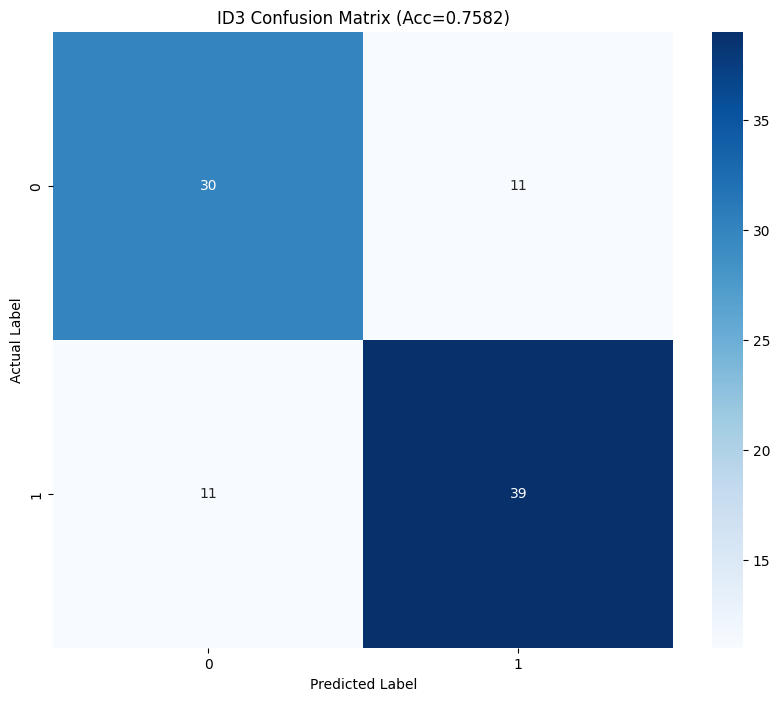

Bùi Hoàn Duy - 6351071012


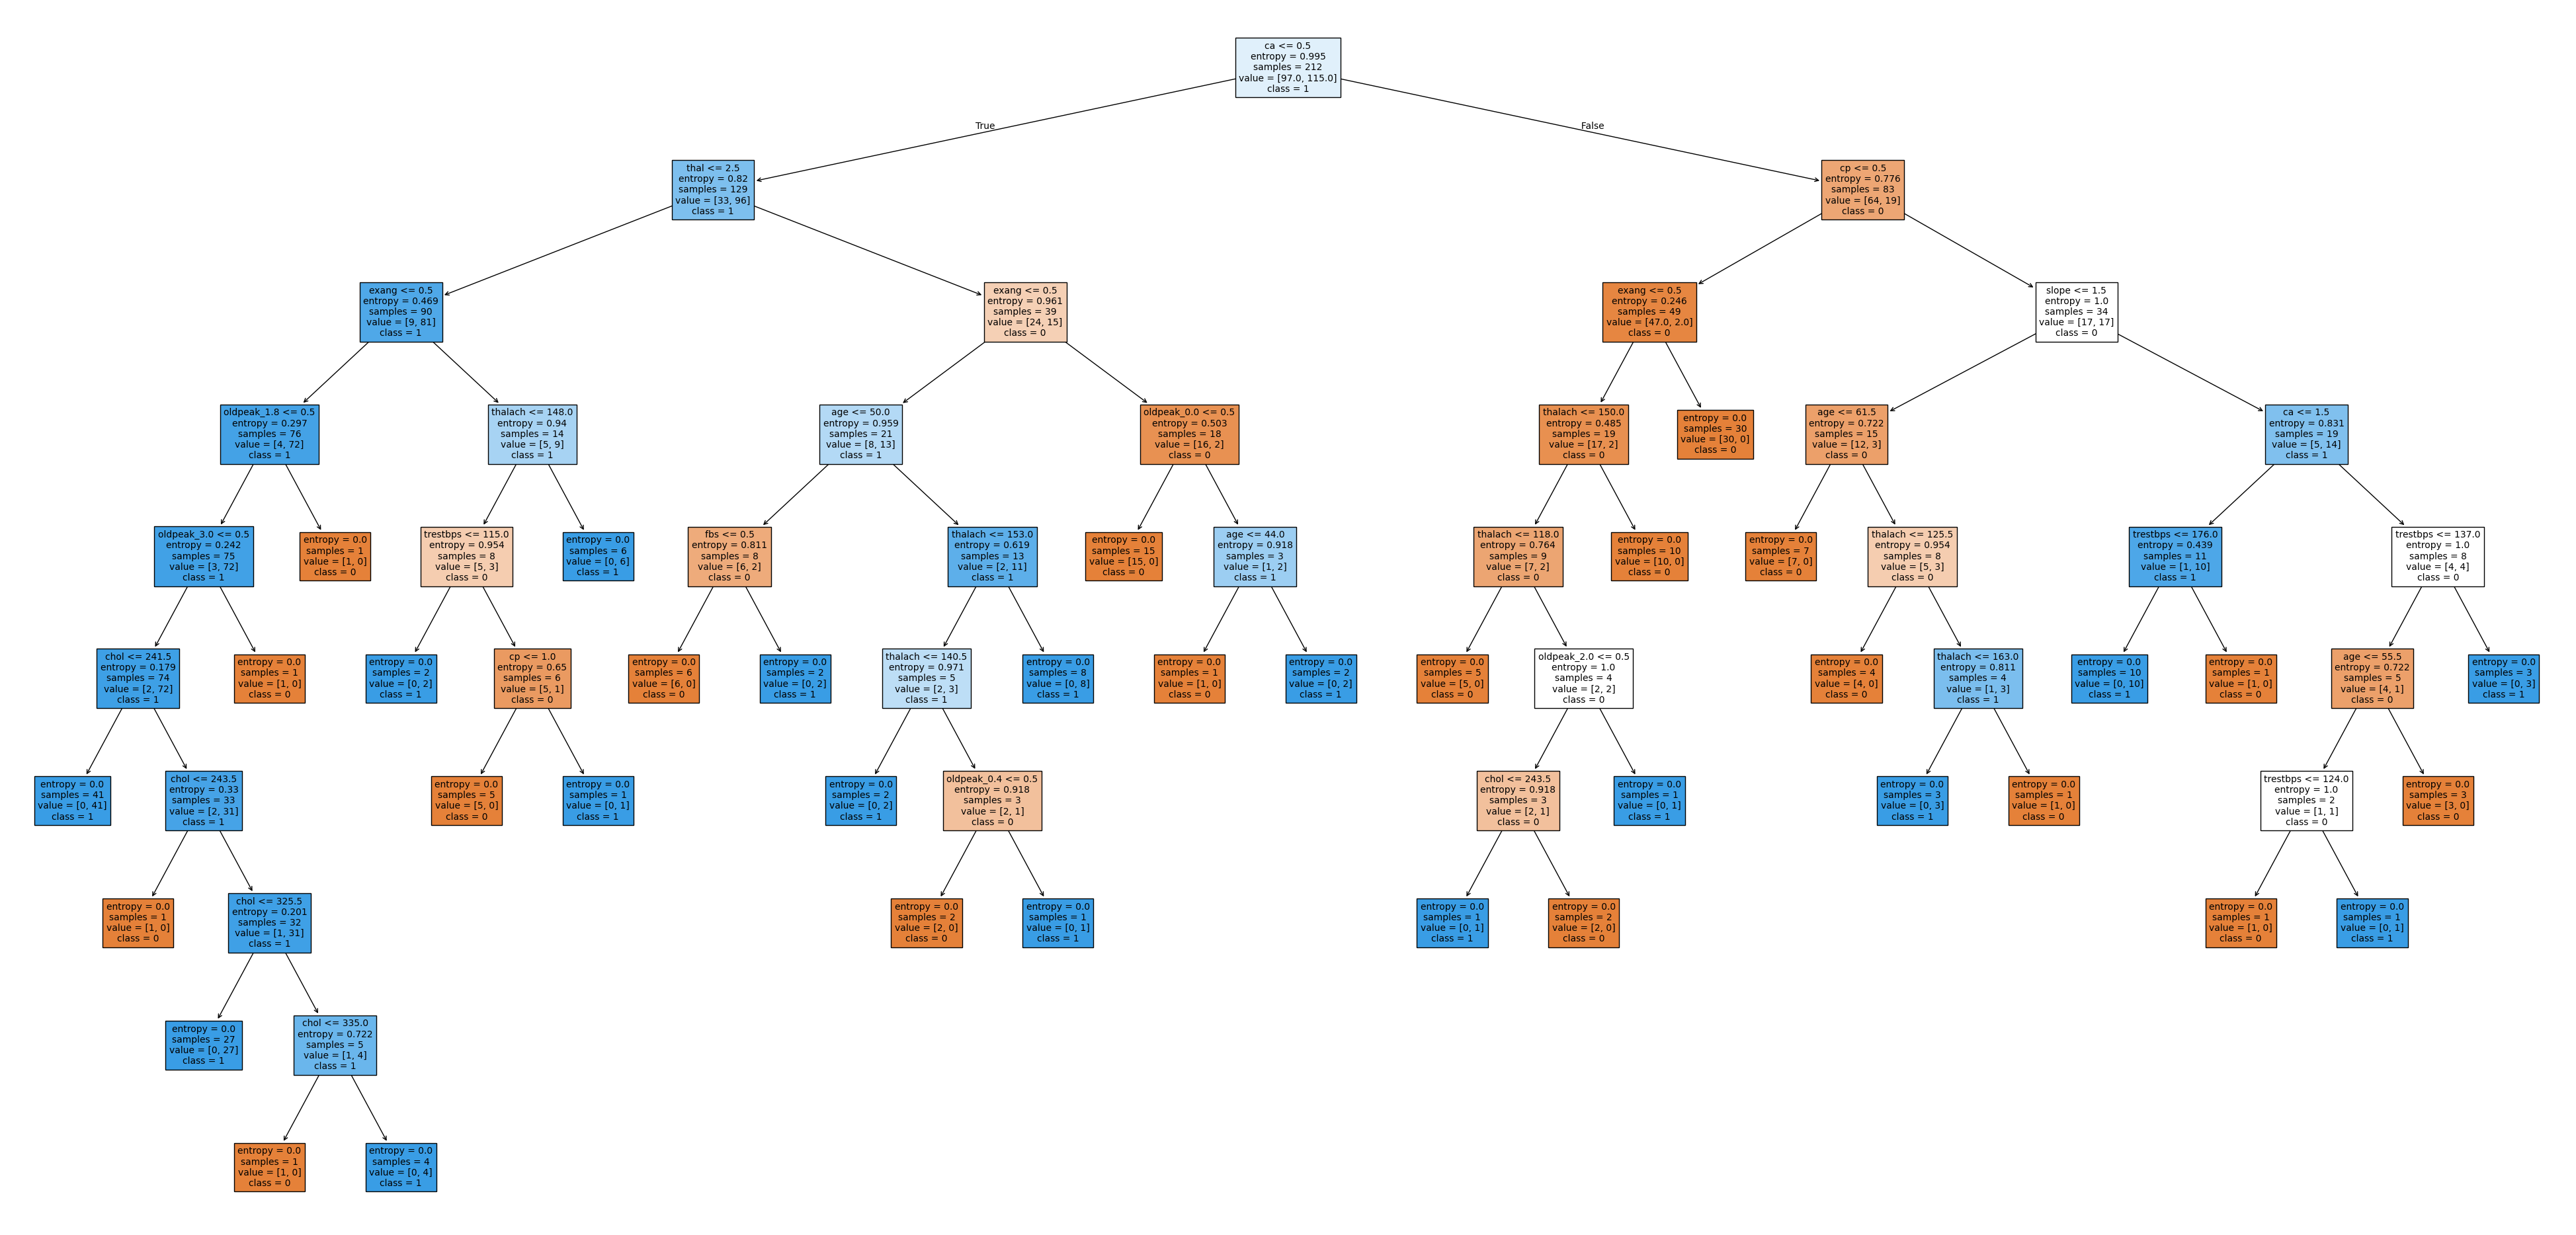

In [ ]:
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

clf_id3 = tree.DecisionTreeClassifier(criterion="entropy", random_state=42)
clf_id3.fit(X_train, y_train)
id3_pred = clf_id3.predict(X_test)
id3_acc = accuracy_score(y_test, id3_pred)
print("ID3 Accuracy:", id3_acc)
print(classification_report(y_test, id3_pred))
cm = confusion_matrix(y_test, id3_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(f"ID3 Confusion Matrix (Acc={id3_acc:.4f})")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
print("Bùi Hoàn Duy - 6351071012")
plt.show()
fig, ax = plt.subplots(figsize=(50, 24))
tree.plot_tree(
    clf_id3,
    filled=True,
    feature_names=features_onehot.columns,
    class_names=[str(c) for c in clf_id3.classes_],
    fontsize=10
)

plt.savefig("decision_tree.png", dpi=100)
plt.show()


Câu 8

CART Accuracy: 0.7692307692307693
              precision    recall  f1-score   support

           0       0.72      0.80      0.76        41
           1       0.82      0.74      0.78        50

    accuracy                           0.77        91
   macro avg       0.77      0.77      0.77        91
weighted avg       0.77      0.77      0.77        91

Bùi Hoàn Duy - 6351071012


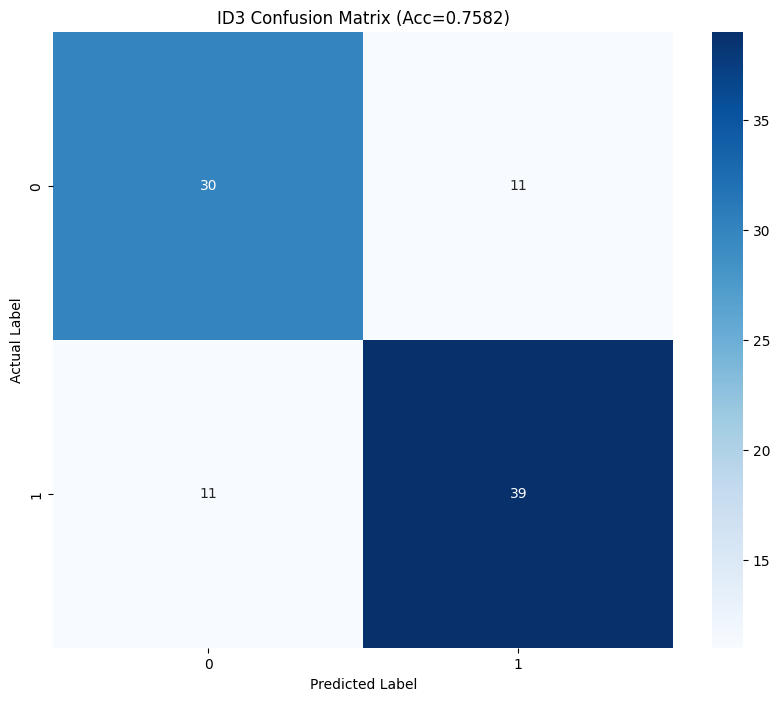

Bùi Hoàn Duy - 6351071012


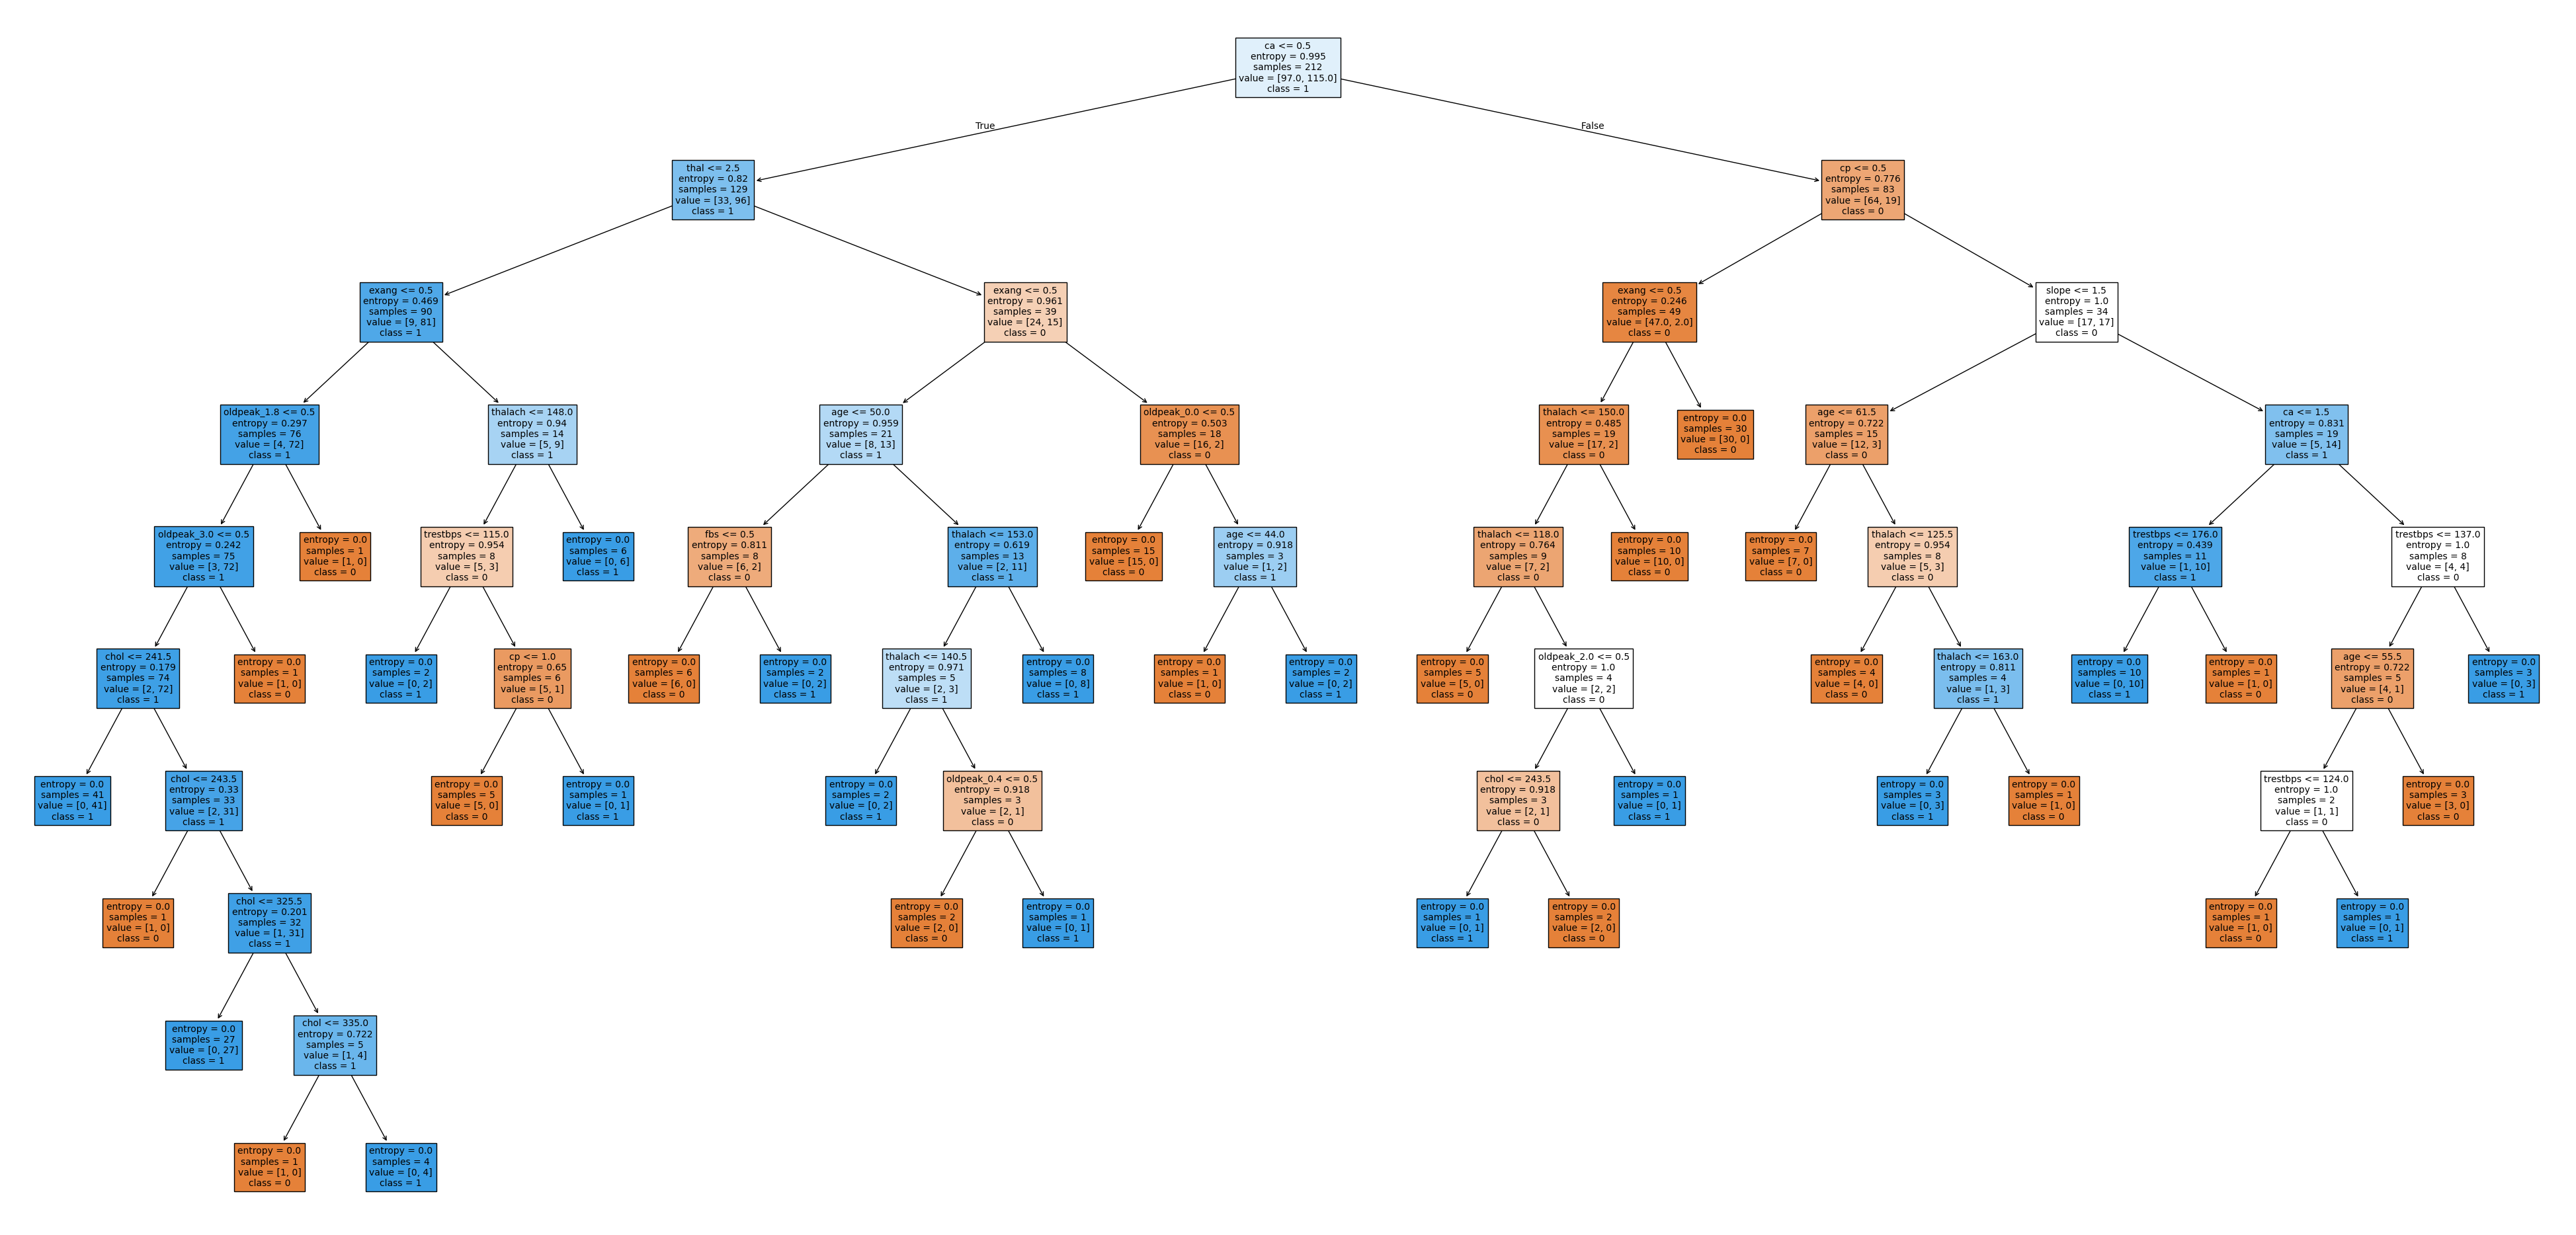

In [ ]:
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

clf_cart = tree.DecisionTreeClassifier(criterion="gini", random_state=42)
clf_cart.fit(X_train, y_train)

cart_pred = clf_cart.predict(X_test)
cart_acc = accuracy_score(y_test, cart_pred)
print("CART Accuracy:", cart_acc)
print(classification_report(y_test, cart_pred))
cm = confusion_matrix(y_test, id3_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(f"ID3 Confusion Matrix (Acc={id3_acc:.4f})")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
print("Bùi Hoàn Duy - 6351071012")
plt.show()
print("Bùi Hoàn Duy - 6351071012")

fig, ax = plt.subplots(figsize=(50, 24))
tree.plot_tree(
    clf_id3,
    filled=True,
    feature_names=features_onehot.columns,
    class_names=[str(c) for c in clf_id3.classes_],
    fontsize=10
)
plt.savefig("decision_tree.png", dpi=100)
plt.show()

Câu 9

Naive Bayes Accuracy: 0.6043956043956044
              precision    recall  f1-score   support

           0       0.67      0.24      0.36        41
           1       0.59      0.90      0.71        50

    accuracy                           0.60        91
   macro avg       0.63      0.57      0.54        91
weighted avg       0.63      0.60      0.55        91

Bùi Hoàn Duy - 6351071012
Bùi Hoàn Duy - 6351071012


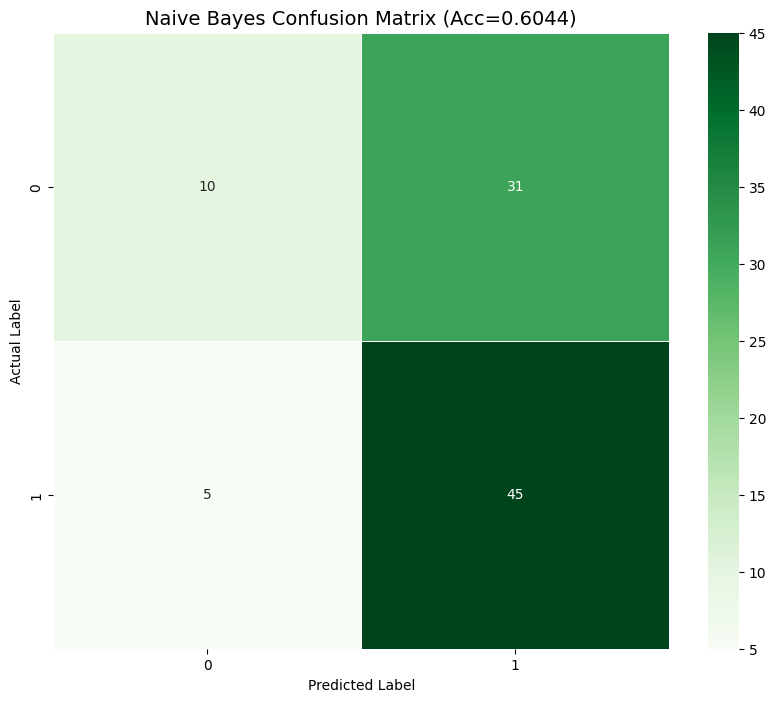

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
gnb = GaussianNB()
gnb.fit(X_train, y_train)

nb_pred = gnb.predict(X_test)
nb_acc = accuracy_score(y_test, nb_pred)
print("Naive Bayes Accuracy:", nb_acc)
print(classification_report(y_test, nb_pred))
print("Bùi Hoàn Duy - 6351071012")

cm = confusion_matrix(y_test, nb_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Greens",
    linewidths=.5,
    square=True
)

plt.title(f"Naive Bayes Confusion Matrix (Acc={nb_acc:.4f})", fontsize=14)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
print("Bùi Hoàn Duy - 6351071012")
plt.show()


Câu 10

,Model,Accuracy
0,CART (gini),0.769231
1,ID3 (entropy),0.758242
2,GaussianNB,0.604396


Bùi Hoàn Duy - 6351071012


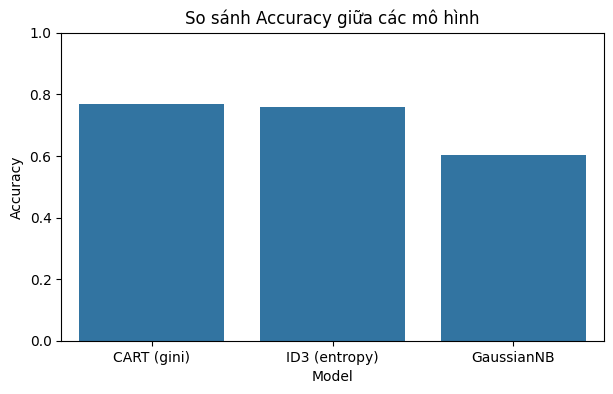

In [11]:
results = {
    "Model": ["ID3 (entropy)", "CART (gini)", "GaussianNB"],
    "Accuracy": [id3_acc, cart_acc, nb_acc]
}
results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False).reset_index(drop=True)
display(results_df)
print("Bùi Hoàn Duy - 6351071012")

# Bar chart
plt.figure(figsize=(7,4))
sns.barplot(x="Model", y="Accuracy", data=results_df)
plt.ylim(0,1)
plt.title("So sánh Accuracy giữa các mô hình")
plt.ylabel("Accuracy")
plt.show()
